In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [ ]:
bank = pd.read_csv('/content/drive/MyDrive/bank1.csv')
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
bank.shape

(41188, 21)

In [ ]:
bank.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [ ]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None
np.set_printoptions(suppress=True)

In [ ]:
bank.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


In [ ]:
bank.duplicated().sum()

12

In [ ]:
bank.drop_duplicates(inplace=True)

In [ ]:
bank.shape

(41176, 21)

In [ ]:
bank.pdays.value_counts()

,count
pdays,
999,39661
3,439
6,412
4,118
9,64
2,61
7,60
12,58
10,52


In [ ]:
bank.describe(include='object')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41176,41176,41176,41176,41176,41176,41176,41176,41176,41176,41176
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10419,24921,12164,32577,21571,33938,26135,13767,8618,35551,36537


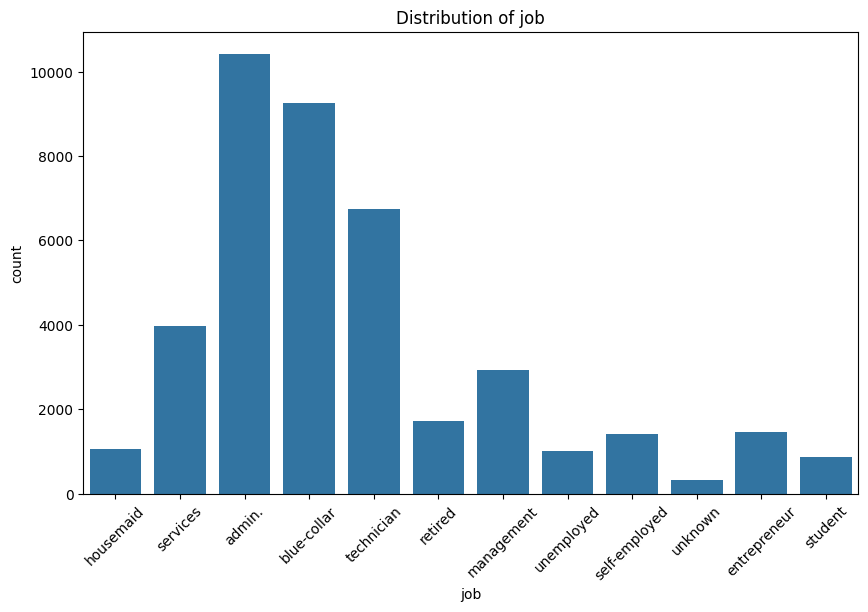

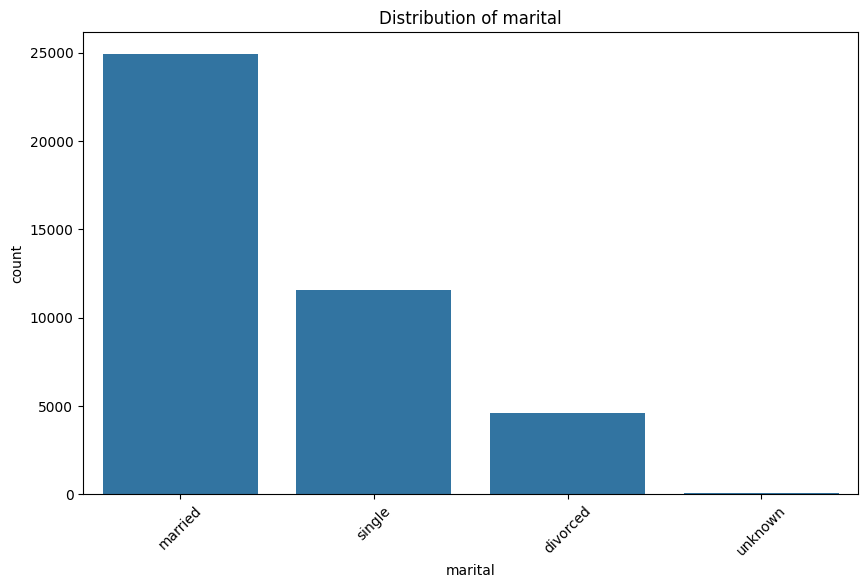

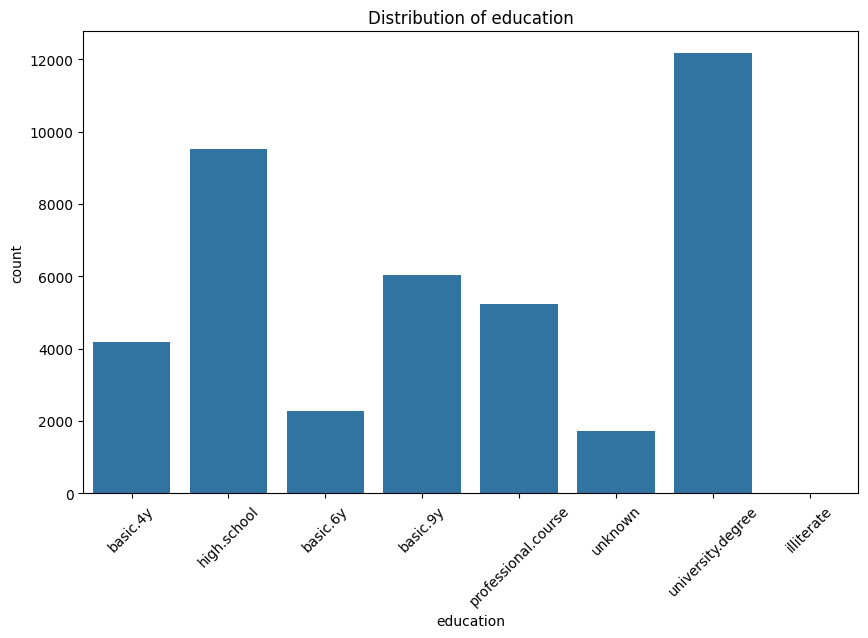

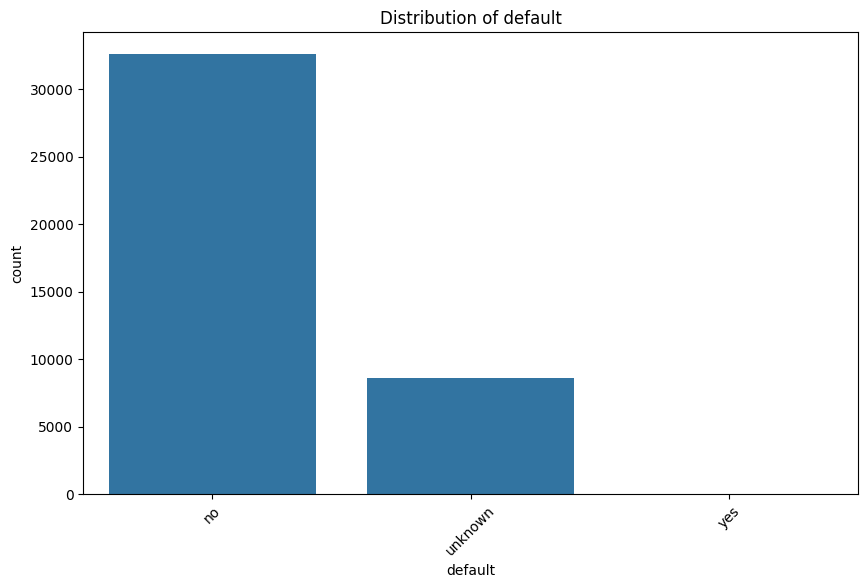

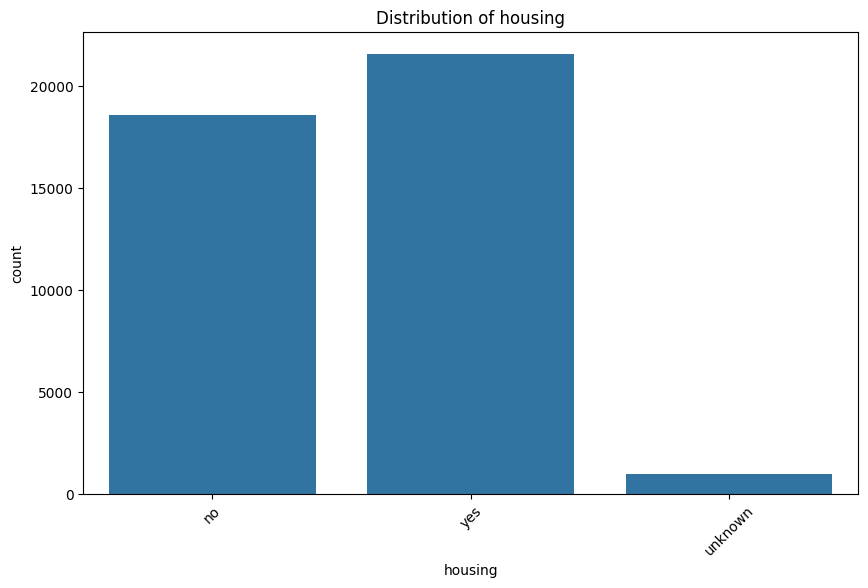

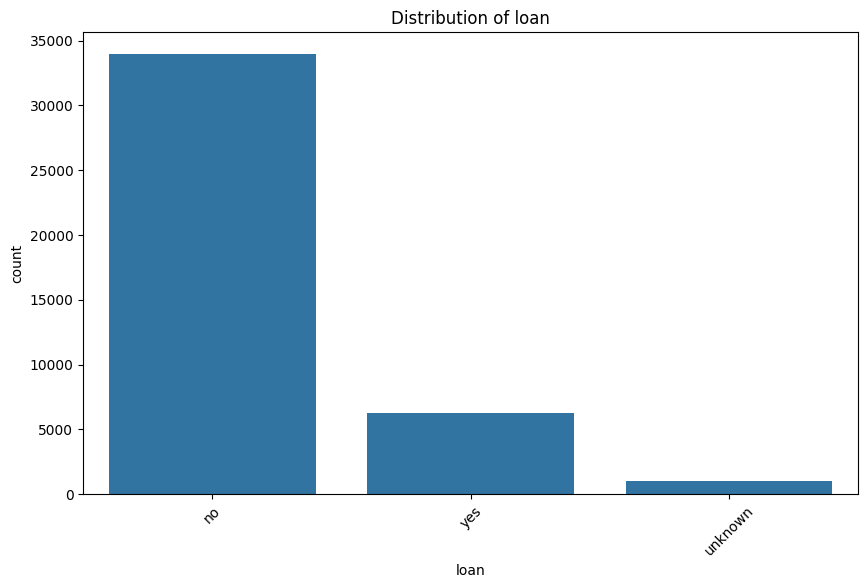

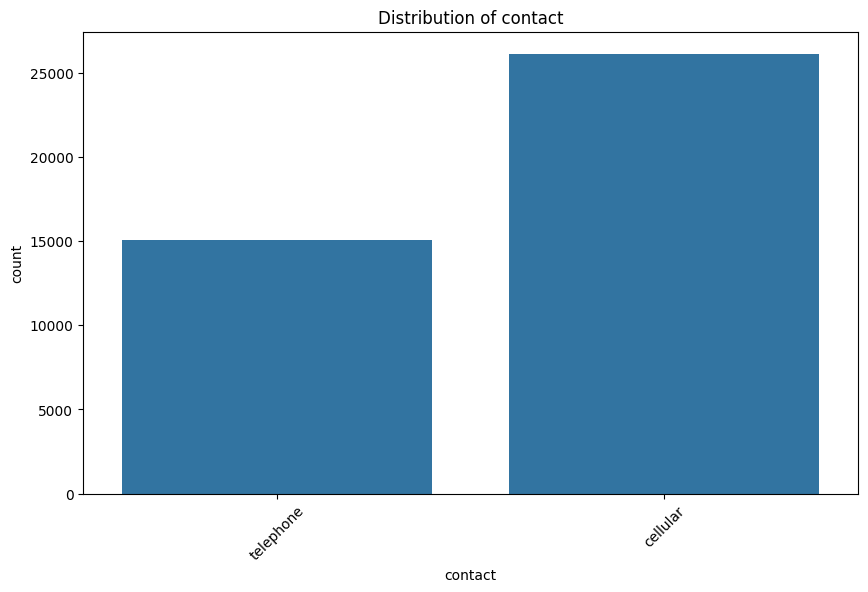

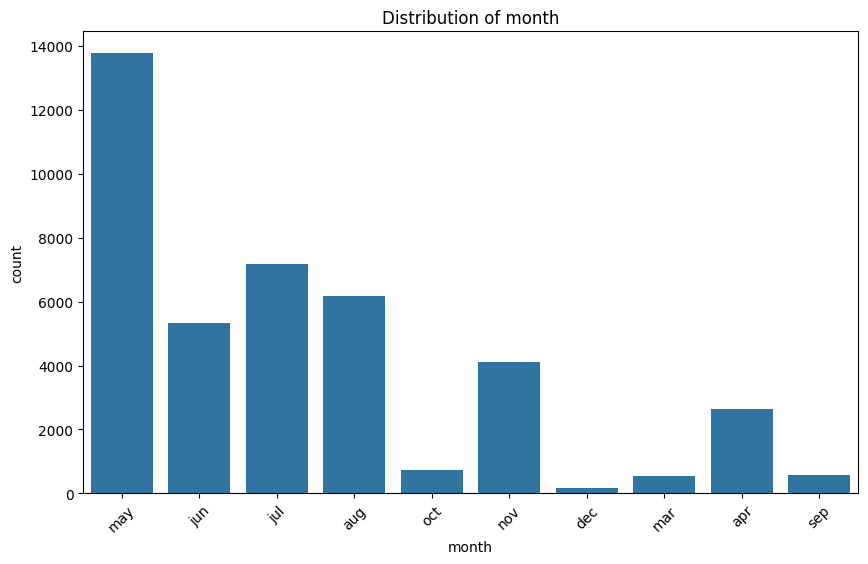

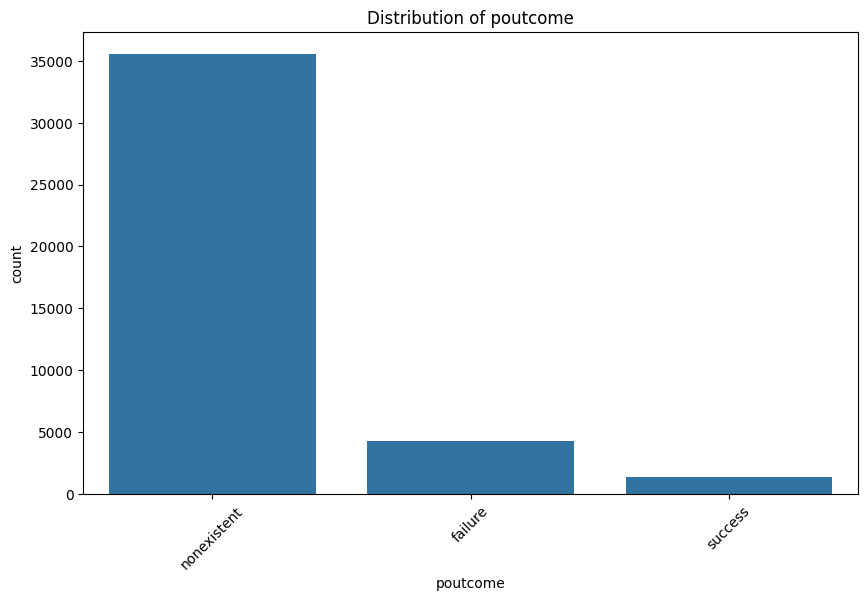

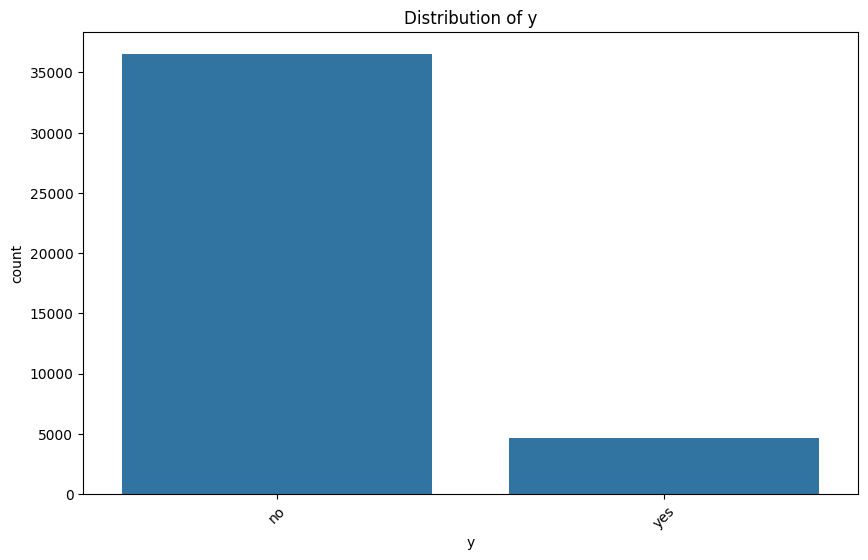

In [ ]:
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']
for feature in categorical_features:
  plt.figure(figsize=(10, 6))
  sns.countplot(x=feature, data=bank)
  plt.title(f'Distribution of {feature}')
  plt.xticks(rotation=45)
  plt.show()

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
num = bank.select_dtypes(include=np.number)

In [ ]:
cat = bank.select_dtypes(include=object)

In [ ]:
dummy = pd.get_dummies(cat,drop_first=True,dtype='int')

In [ ]:
dummy.head()

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,marital_unknown,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_unknown,default_yes,housing_unknown,housing_yes,loan_unknown,loan_yes,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,y_yes
0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
2,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
4,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0


In [ ]:
Bank_dummy = pd.concat([num,dummy],axis=1)
Bank_dummy.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,marital_unknown,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_unknown,default_yes,housing_unknown,housing_yes,loan_unknown,loan_yes,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,y_yes
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0


In [ ]:
Bank_dummy.shape

(41176, 54)

In [ ]:
X = Bank_dummy.drop('y_yes',axis=1)
y = Bank_dummy['y_yes']

In [ ]:
X.shape, y.shape

((41176, 53), (41176,))

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
Scaler = StandardScaler()
X_train = Scaler.fit_transform(X_train)
X_test = Scaler.transform(X_test)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(32940, 53)
(8236, 53)
(32940,)
(8236,)


In [ ]:
logreg = LogisticRegression()

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy Score: 0.906386595434677

Confusion Matrix:
 [[7068  197]
 [ 574  397]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.95      7265
           1       0.67      0.41      0.51       971

    accuracy                           0.91      8236
   macro avg       0.80      0.69      0.73      8236
weighted avg       0.89      0.91      0.90      8236



In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
par = {
    'criterion' : ['gini','entropy'],
    'max_depth' : [5,7],
    'ccp_alpha' : [0.01,0.1]
}

Dt = DecisionTreeClassifier()

gscv = GridSearchCV(Dt, param_grid=par, cv=5, scoring='accuracy')

gscv.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': [0.01, 0.1],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 7]},
             scoring='accuracy')

In [ ]:
dtree = DecisionTreeClassifier()

dtree.fit(X_train, y_train)

y_pred_dtree = dtree.predict(X_test)

print("Accuracy Score (Decision Tree with selected features):", accuracy_score(y_test, y_pred_dtree))
print("\nConfusion Matrix (Decision Tree with selected features):\n", confusion_matrix(y_test, y_pred_dtree))
print("\nClassification Report (Decision Tree with selected features):\n", classification_report(y_test, y_pred_dtree))

Accuracy Score (Decision Tree with selected features): 0.8895094706168043

Confusion Matrix (Decision Tree with selected features):
 [[6811  454]
 [ 456  515]]

Classification Report (Decision Tree with selected features):
               precision    recall  f1-score   support

           0       0.94      0.94      0.94      7265
           1       0.53      0.53      0.53       971

    accuracy                           0.89      8236
   macro avg       0.73      0.73      0.73      8236
weighted avg       0.89      0.89      0.89      8236



In [ ]:
par = { 'n_estimators' : [30,50,70],
        'max_depth' : [5,7,9],
        'criterion' : ['gini','entropy'],
        'ccp_alpha' : [0.001,0.01,0.1]
}
Rf = RandomForestClassifier()
gscv = GridSearchCV(Rf, {}, cv=5, scoring='accuracy')

gscv.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(), param_grid={},
             scoring='accuracy')

In [ ]:
model = RandomForestClassifier()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy Score (with selected features):", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix (with selected features):\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report (with selected features):\n", classification_report(y_test, y_pred))

Accuracy Score (with selected features): 0.9091792132102963

Confusion Matrix (with selected features):
 [[7041  224]
 [ 524  447]]

Classification Report (with selected features):
               precision    recall  f1-score   support

           0       0.93      0.97      0.95      7265
           1       0.67      0.46      0.54       971

    accuracy                           0.91      8236
   macro avg       0.80      0.71      0.75      8236
weighted avg       0.90      0.91      0.90      8236



In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
X_re , y_re = SMOTE().fit_resample(X,y)

In [ ]:
X_re.shape, y_re.shape

((73074, 53), (73074,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_re, y_re, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rmf = RandomForestClassifier()
rmf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
imp = rmf.feature_importances_
imp

array([0.03220027, 0.2870462 , 0.01667443, 0.01659753, 0.01023042,
       0.05074422, 0.04106606, 0.05088373, 0.08655173, 0.06669243,
       0.02112536, 0.00255386, 0.0021286 , 0.0050766 , 0.0027641 ,
       0.00252909, 0.00627684, 0.00182175, 0.0102252 , 0.00173073,
       0.00070861, 0.01490777, 0.01141506, 0.00019974, 0.00299467,
       0.01278728, 0.01847153, 0.00004393, 0.01060055, 0.01570055,
       0.00355733, 0.01747134, 0.00000001, 0.0010894 , 0.01350083,
       0.00103167, 0.00816727, 0.03165896, 0.00406935, 0.00034114,
       0.00552328, 0.00365518, 0.0010212 , 0.02019888, 0.00429516,
       0.00271587, 0.00097333, 0.01797112, 0.01193655, 0.01268012,
       0.01046616, 0.01838889, 0.00653807])

In [ ]:
fe_imp = pd.DataFrame({'feature':X_train.columns,'importance':imp})
fe_imp

,feature,importance
0,age,3.220027e-02
1,duration,2.870462e-01
2,campaign,1.667443e-02
3,pdays,1.659753e-02
4,previous,1.023042e-02
5,emp.var.rate,5.074422e-02
6,cons.price.idx,4.106606e-02
7,cons.conf.idx,5.088373e-02
8,euribor3m,8.655173e-02
9,nr.employed,6.669243e-02


In [ ]:
fe_imp = fe_imp.sort_values('importance',ascending=False)
fe_imp

,feature,importance
1,duration,2.870462e-01
8,euribor3m,8.655173e-02
9,nr.employed,6.669243e-02
7,cons.conf.idx,5.088373e-02
5,emp.var.rate,5.074422e-02
6,cons.price.idx,4.106606e-02
0,age,3.220027e-02
37,contact_telephone,3.165896e-02
10,job_blue-collar,2.112536e-02
43,month_may,2.019888e-02


In [ ]:
threshold = 0.01
selected_features = fe_imp[fe_imp['importance'] > threshold]['feature']
print(selected_features)

1                          duration
8                         euribor3m
9                       nr.employed
7                     cons.conf.idx
5                      emp.var.rate
6                    cons.price.idx
0                               age
37                contact_telephone
10                  job_blue-collar
43                        month_may
26            education_high.school
51             poutcome_nonexistent
47                  day_of_week_mon
31                  default_unknown
2                          campaign
3                             pdays
29      education_university.degree
21                  marital_married
34                      housing_yes
25               education_basic.9y
49                  day_of_week_tue
48                  day_of_week_thu
22                   marital_single
28    education_professional.course
50                  day_of_week_wed
4                          previous
18                   job_technician
Name: feature, dtype: object

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

In [ ]:
print(X_train_selected.shape)
print(X_test_selected.shape)
print(y_train.shape)
print(y_test.shape)

(58459, 27)
(14615, 27)
(58459,)
(14615,)


In [ ]:


logreg = LogisticRegression()

logreg.fit(X_train_selected, y_train)

y_pred_logreg = logreg.predict(X_test_selected)

print("Accuracy Score (Logistic Regression with selected features):", accuracy_score(y_test, y_pred_logreg))
print("\nConfusion Matrix (Logistic Regression with selected features):\n", confusion_matrix(y_test, y_pred_logreg))
print("\nClassification Report (Logistic Regression with selected features):\n", classification_report(y_test, y_pred_logreg))


Accuracy Score (Logistic Regression with selected features): 0.9020868970236059

Confusion Matrix (Logistic Regression with selected features):
 [[6670  678]
 [ 753 6514]]

Classification Report (Logistic Regression with selected features):
               precision    recall  f1-score   support

           0       0.90      0.91      0.90      7348
           1       0.91      0.90      0.90      7267

    accuracy                           0.90     14615
   macro avg       0.90      0.90      0.90     14615
weighted avg       0.90      0.90      0.90     14615



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
dtree = DecisionTreeClassifier()

dtree.fit(X_train_selected, y_train)

y_pred_dtree = dtree.predict(X_test_selected)

print("Accuracy Score (Decision Tree with selected features):", accuracy_score(y_test, y_pred_dtree))
print("\nConfusion Matrix (Decision Tree with selected features):\n", confusion_matrix(y_test, y_pred_dtree))
print("\nClassification Report (Decision Tree with selected features):\n", classification_report(y_test, y_pred_dtree))

Accuracy Score (Decision Tree with selected features): 0.9304139582620595

Confusion Matrix (Decision Tree with selected features):
 [[6810  538]
 [ 479 6788]]

Classification Report (Decision Tree with selected features):
               precision    recall  f1-score   support

           0       0.93      0.93      0.93      7348
           1       0.93      0.93      0.93      7267

    accuracy                           0.93     14615
   macro avg       0.93      0.93      0.93     14615
weighted avg       0.93      0.93      0.93     14615



In [ ]:
model = RandomForestClassifier()

model.fit(X_train_selected, y_train)

y_pred = model.predict(X_test_selected)

print("Accuracy Score (with selected features):", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix (with selected features):\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report (with selected features):\n", classification_report(y_test, y_pred))

Accuracy Score (with selected features): 0.9510776599384194

Confusion Matrix (with selected features):
 [[6982  366]
 [ 349 6918]]

Classification Report (with selected features):
               precision    recall  f1-score   support

           0       0.95      0.95      0.95      7348
           1       0.95      0.95      0.95      7267

    accuracy                           0.95     14615
   macro avg       0.95      0.95      0.95     14615
weighted avg       0.95      0.95      0.95     14615



In [ ]:
# Random Forest with SMOTE and top selected feture model performs better in predicting if the client will subscribe to term deposit or no
# its predict 0.95% of the accurecy